# INTRODUCTION TO THE CLASSIFICATION PROBLEM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, \
precision_score,recall_score, accuracy_score,f1_score, roc_auc_score, auc

import seaborn as sns

### Load dataset

In [61]:
# let's load the data
url = 'https://raw.githubusercontent.com/giandopal/Artificial-Intelligence-with-Python/main/data/Default.csv'
default = pd.read_csv(url, usecols=[1,2,3,4])

In [62]:
default.iloc[:,1]

0        No
1       Yes
2        No
3        No
4        No
       ... 
9995     No
9996     No
9997     No
9998     No
9999    Yes
Name: student, Length: 10000, dtype: object

In [63]:
# we have 10000 samples. about 400 KB of memory. Not too much
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [64]:
default.head(10)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
5,No,Yes,919.588530,7491.558572
6,No,No,825.513331,24905.226578
7,No,Yes,808.667504,17600.451344
8,No,No,1161.057854,37468.529288
9,No,No,0.000000,29275.268293


## The Dataset
- We have a 'continuous' feature: **annual income** (annual income of the person)
- We have a 'continuous' feature: **card balances** (average monthly credit card balance)
- We have a 'qualitative' feature (categorical): **student** (YES/NO) (if the creditor is a student)
- We have a 'qualitative' feature: **default** (YES/NO) (if the creditor has not paid the credit card bill)

Our goal is to build a supervised learning model that allows us to predict whether the creditor will default (fail to pay the card bill) based on the creditor's income and the average balance he has on the credit card

The dataset is the same one used in the book Introduction to Statistical Learning- Hastie, Tibshirani - chapter 4, pg 129.

## How do we treat the 'Qualitative' columns?
## Note that features can only take the values ​​YES or NO.
## I therefore consider the following association: NO = 0, YES=1 and replace the values ​​in the respective columns

In [65]:
# Voglio creare due classi, una per la feature default e una per la feature student

# Note: factorize() returns two objects: a label array (1 and 0) and an array with the unique values.
# We are only interested in the first object. 
# We create 2 more columns on our dataset with the "flags" 0 and 1 for Student-Non Student and Default- Non Default

default['default2'] = default.default.factorize()[0]
default['student2'] = default.student.factorize()[0]
default.head(3)

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0


In [66]:
# Of course we can filter on the categorical variable
default[default.default2 == 0]


,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0
...,...,...,...,...,...,...
9995,No,No,711.555020,52992.378914,0,0
9996,No,No,757.962918,19660.721768,0,0
9997,No,No,845.411989,58636.156984,0,0
9998,No,No,1569.009053,36669.112365,0,0


Statistical MEAN, VARIANCE AND STANDARD DEVIATION: a quick recap
Remember
- Sample **MEAN** is defined as $\bar X = \frac{1}{N} \sum \limits_{i=1}^{N} x_i$
- Variance measures the spread of data points from the mean; it is the average of squared differences from the mean.
- The **SAMPLE VARIANCE** is defined as  $\sigma^2 = \frac{1}{N-1} \sum \limits_{i=1}^{N}  (x_i- \bar x)^2$
- Standard Deviation (SD) is the square root of variance, showing how much data deviates from the mean in original units.
- The **STANDARD DEVIATION** is defined as $\sigma = \sqrt VARIANCE$

- Usage: A higher variance/SD means more **spread-out data**, while a lower value means data is closer to the mean.  

## Exercise1: 
- plot in an histogram the distribution of the balance
- calculate the mean, the variance and the standard deviation
- Make your observations. 

In [ ]:
balance = default.balance.values

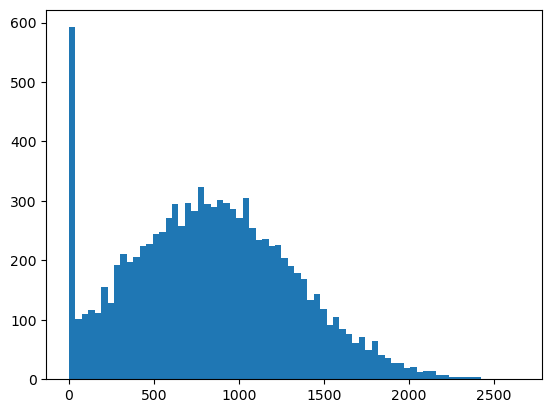

In [24]:
plt.hist(balance, bins=70);

In [29]:
print("Mean value=",balance.mean())
var = balance.var()
print("Variance=",var)
print("STD=",np.sqrt(var))

Mean value= 835.3748856125571
Variance= 233956.7888937792
STD= 483.6907988516829


## Exercise2: 
- plot in an histogram the distribution of the income
- calculate the mean, the variance and the standard deviation
- Make your observations. 
- plot the distribution of the income for students and non students and make a comparison

In [32]:
income = default.income.values

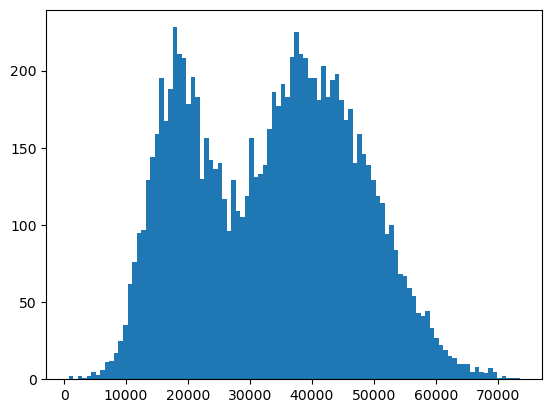

In [19]:
plt.hist(income, bins=100);

In [38]:
default_yes

,default,student,balance,income,default2,student2
136,Yes,Yes,1486.998122,17854.397028,1,1
173,Yes,Yes,2205.799521,14271.492253,1,1
201,Yes,Yes,1774.694223,20359.506086,1,1
206,Yes,No,1889.599190,48956.171589,1,0
209,Yes,Yes,1899.390626,20655.200003,1,1
...,...,...,...,...,...,...
9912,Yes,No,2148.898454,44309.917173,1,0
9921,Yes,Yes,1627.898323,17546.997016,1,1
9949,Yes,No,1750.253150,51578.940163,1,0
9951,Yes,No,1515.606239,48688.512086,1,0


In [46]:
# Take a fraction of the samples where target value (default) is 'no'
default_no = default[default.default2 == 0].sample(frac=0.10)
# Take all samples  where target value is 'yes'
default_yes = default[default.default2 == 1]

# append the default YES to the end of the sample of DEFAULT NO
default_= pd.concat([default_no, default_yes], ignore_index=True)

In [47]:
default_.shape

(1300, 6)

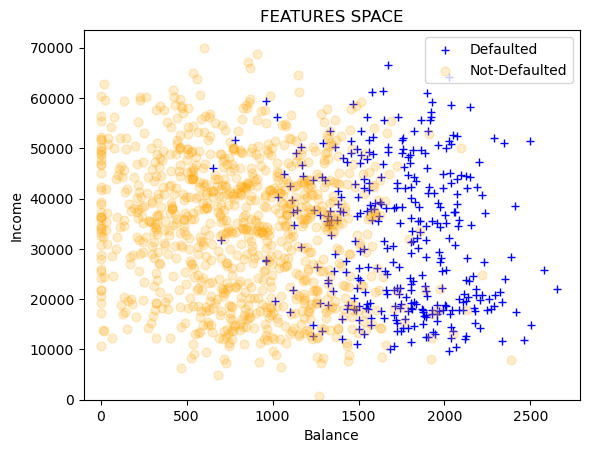

In [48]:

plt.scatter(default_[default_.default == 'Yes'].balance, default_[default_.default == 'Yes'].income, \
    s=40, c='blue', marker='+',linewidths=1, label="Defaulted")

plt.scatter(default_[default_.default == 'No'].balance, default_[default_.default == 'No'].income, \
    s=40, c='orange', marker='o',linewidths=1, alpha=.2,label="Not-Defaulted")

plt.legend()
plt.title('FEATURES SPACE')
plt.ylim(ymin=0)
plt.ylabel('Income')
plt.xlim(xmin=-100)
plt.xlabel('Balance')
plt.show()


## From the figure we can observe that the "Income" feature is less important than the "Balance" feature in determining who has defaulted

# Let's try to simplify the problem and consider only one feature: the Balance
(in the case of only one feature the problem is called BINARY CLASSIFICATION PROBLEM)

Let's plot the data

In [67]:
x_train = default['balance'].values
y_train = default['default2'].values

In [68]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

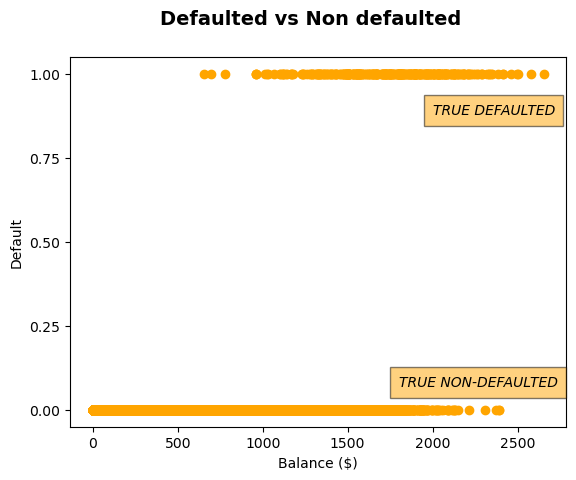

In [69]:
fig = plt.figure()
ax = fig.add_subplot()
# Set titles for the figure and the subplot respectively
fig.suptitle('Defaulted vs Non defaulted', fontsize=14, fontweight='bold')
# true value
ax.scatter(x_train,y_train, c='orange')

ax.text(2000, 0.88, 'TRUE DEFAULTED', style='italic', bbox={'facecolor': 'orange', 'alpha': 0.5, 'pad': 6})
ax.text(1800, 0.07, 'TRUE NON-DEFAULTED', style='italic', bbox={'facecolor': 'orange', 'alpha': 0.5, 'pad': 6})

ax.set_ylabel('Default');
ax.set_xlabel('Balance ($)');
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.]);

# Il nostro è un problema di classificazione. 
Sulla base del valore del Balance vogliamo classificare se il debitore andrà in default oppure no.

PREDICTOR: X = balance - TARGET: Y= CLASSE DI APPARTENENZA (0= DEFAULT 1= NON DEFAULT) 

Utilizzeremo un modello PROBABILISTICO denominato **LOGISTIC REGRESSION**

Utilizzeremo una funzione $P(Y=1|X)$ che ha lo stesso ruolo della linear regression function (HYPOTHESIS) $h(x) = \hat y =  \theta_0 + \theta_1x$

La funzione ci fornirà UNA PROBABILITA' CONDIZIONATA $Pr(Y=1|X=k)$. Questa scrittura si legge: la probabilità che la variabile Y sia uguale a 1 DATO  che la variabile X= k.   

Per esempio se Pr(Y=1| X=1000) restituisce 0.3, significa che la probabilità che con un balance di 1000 dollari si vada in default è del 30%


Essendo la $P(Y=1|X)$ una funzione analoga alla $h(x)$, necessiterà di un training per la configurazione dei parametri

Una volta effettuato il training e trovati i paramentri $\theta_0,\theta_1$, $P(Y=1|X)$ è il predittore probabilistico che stiamo cercando.

Come funziona questa predittore che abbiamo trovato?

Se utilizziamo come input del predictor una specifica x di training posso stimare la probabilità che tale input appartenga alla 0 o 1. 

Fai attenzione che poiché la relazione tra $P(Y=1|X)$ e X NON È LINEARE.


# CENNI SULLA COST FUNCTION DELLA LOGISTIC REGRESSION

$P(Y=1|X) è una funzione che ha lo stesso ruolo della linear regression function (HYPOTHESIS) $h(x) = \hat y =  \theta_0 + \theta_1x$

Ricordiamo che per poter utilizzare la $h(x)$ è necessario calcolare i parametri attraverso un processo di learning (training) che consiste nel minimizzare la COST FUNCTION. 

Nel nostro modello di **logistic regression** abbiamo una cosa analoga:
Scegliamo  $P(Y=1|X) = \sigma (\theta_0 + \theta_1x)$

dove $\sigma$ è il LOGISTIC SIGMOID   = $1/(1+exp(-x))$ 

Quindi $P(Y=1|X) = \frac {1}{1+e^{(-(\theta_0 + \theta_1x))}}$ 

The cost function for logistic regression is defined as:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log h_{\theta}(x^{(i)}) + (1 - y^{(i)}) \log (1 - h_{\theta}(x^{(i)})) \right]
$$

where:

- $J(\theta)$ is the cost function.
- $m$ is the number of training examples.
- $y^{(i)}$ is the actual label (0 or 1) for the $i$-th training example.
- $h_{\theta}(x)$ is the hypothesis (sigmoid function):  
  $$
  h_{\theta}(x) = \frac{1}{1 + e^{-\theta_0 - \theta_1 x}}
  $$
- $x^{(i)}$ is the feature value of the $i$-th training example.
- $\theta_0, \theta_1$ are the parameters of the model.

This function measures how well the logistic regression model fits the data.




In [70]:
x_train.shape

(10000,)

In [71]:
# Let's try with one feature - Balance
x_train_ = x_train.reshape(-1,1) 
# Crea un'istanza del modello di logistic regression
model = LogisticRegression()

# Addestra il modello sui dati di training
model.fit(x_train_, y_train)

# Calcoliamo le probabilità P(y=1 | x)
y_pred = model.predict_proba(x_train_)

# Stampa le predizioni
print(y_pred[:,0])

[0.99869432 0.9978874  0.99140525 ... 0.99753348 0.88324037 0.99992855]


Text(300, 0.6, 'Predicted Probability P(y=1|x)')

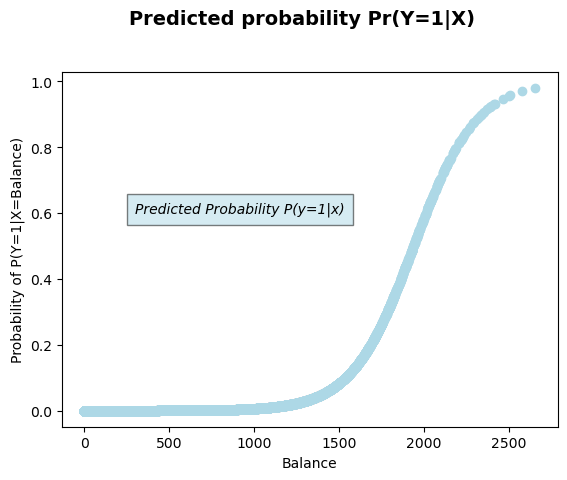

In [72]:
fig = plt.figure()
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

# Set titles for the figure and the subplot respectively
fig.suptitle('Predicted probability Pr(Y=1|X)', fontsize=14, fontweight='bold')

# plot predicted value
ax.scatter(x_train, y_pred[:,1], color='lightblue')

ax.set_ylabel('Probability of P(Y=1|X=Balance)');
ax.set_xlabel('Balance');
ax.text(300, 0.60, 'Predicted Probability P(y=1|x)', style='italic', bbox={'facecolor': 'lightblue', 'alpha': 0.5, 'pad': 6})

## DECISION BOUNDARY
Facciamo attenzione perchè ora abbiamo un PREDICTORE PROBABILISTICO MA DOBBIAMO ANCORA PASSARE ATTRAVERSO UN PROCESSO DECISIONALE. Dobbiamo fissare una SOGLIA sulla nostra probabilità, al di sopra della quale decidiamo di assegnare l'input alla classe 1 o 0.

Per esempio. Supponiamo che per un dato X si abbia $P(Y=1|X) =0.65$. Quindi il predittore dice che sulla base del modello adattato (quindi sulla base delle informazioni che ho usato per addestrarlo) abbiamo una probabilità del 65% che quella caratteristica produca una classe 1 e il 35%, una classe 0. Ora, quale decisione possiamo prendere? Classe 1? Supponiamo di fissare come soglia 0,5. Questo significa che se il mio predittore ci da una probabilità superiore al 50% allora classifico il dato di input come 1 altrimenti 0. 

Se invece fisso la soglia a 0,75, allora nel caso in cui l'ipotesi function mi da 0.65, classifico l'input nella classe 0

Il processo decisionale è quindi sempre decisivo.


/var/folders/s5/gcy6hmzn6zgd1mwk8vv9g7gr0000gn/T/ipykernel_15832/1075412796.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  axs[1].plot([1950,1950],[0,1], 'g--', c='blue') # class boundary
/var/folders/s5/gcy6hmzn6zgd1mwk8vv9g7gr0000gn/T/ipykernel_15832/1075412796.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  axs[0].plot([1950,1950],[0,1], 'g--', c='blue') # class boundary


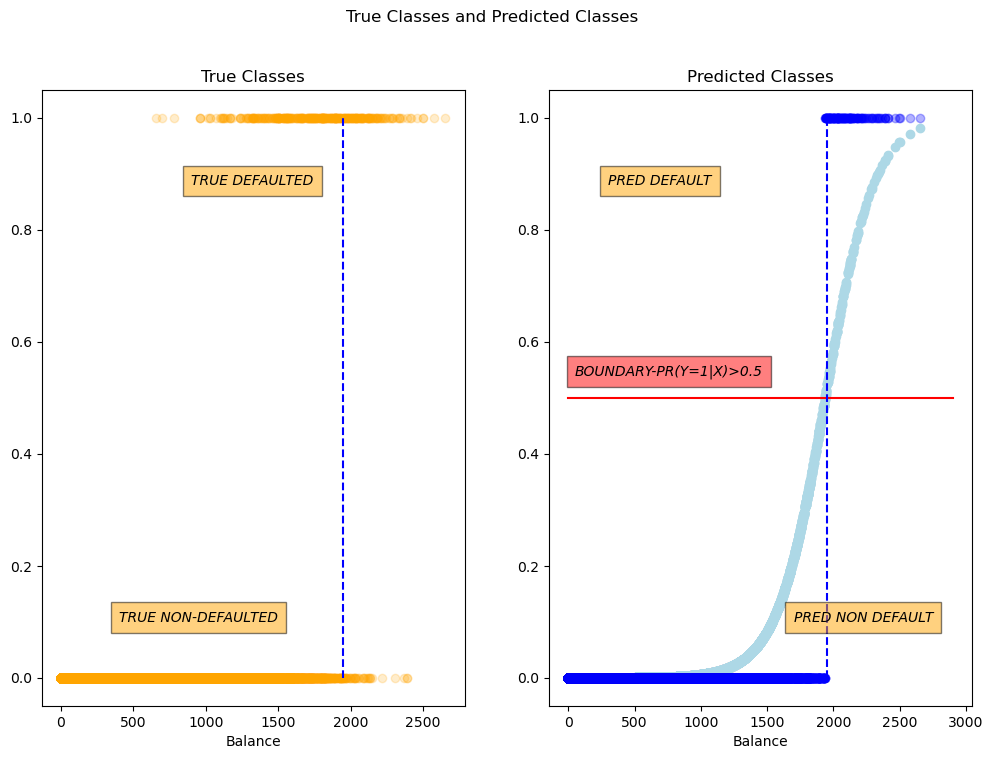

In [79]:
fig, axs = plt.subplots(1,2, figsize=(12, 8))
axs = axs.flatten()

y_pred_class = model.predict(x_train_)
# Plotta i tre grafici
axs[1].scatter(x_train, y_pred[:,1], color='lightblue')
axs[1].scatter(x_train, y_pred_class, color='blue', alpha= 0.3)
axs[1].plot([0,2900],[0.5,0.5], c='red') # decision boundary
axs[1].plot([1950,1950],[0,1], 'g--', c='blue') # class boundary
axs[1].text(300, 0.88, 'PRED DEFAULT', style='italic', bbox={'facecolor': 'orange', 'alpha': 0.5, 'pad': 6})
axs[1].text(1700, 0.1, 'PRED NON DEFAULT', style='italic', bbox={'facecolor': 'orange', 'alpha': 0.5, 'pad': 6})
axs[1].text(50, 0.54, 'BOUNDARY-PR(Y=1|X)>0.5', style='italic', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 6})


axs[0].scatter(x_train, y_train, color='orange', alpha=0.2)
axs[0].text(900, 0.88, 'TRUE DEFAULTED', style='italic', bbox={'facecolor': 'orange', 'alpha': 0.5, 'pad': 6})
axs[0].text(400, 0.1, 'TRUE NON-DEFAULTED', style='italic', bbox={'facecolor': 'orange', 'alpha': 0.5, 'pad': 6});
axs[0].plot([1950,1950],[0,1], 'g--', c='blue') # class boundary


# Aggiunge etichette agli assi e alla figura
fig.suptitle('True Classes and Predicted Classes')
axs[0].set_xlabel('Balance')
axs[0].set_title("True Classes")
axs[1].set_xlabel('Balance')
axs[1].set_title("Predicted Classes")

# Mostra la figura
plt.show()

/var/folders/s5/gcy6hmzn6zgd1mwk8vv9g7gr0000gn/T/ipykernel_15832/2393485021.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  ax.plot([1950,1950],[0,1], 'g--', c='blue') # class boundary


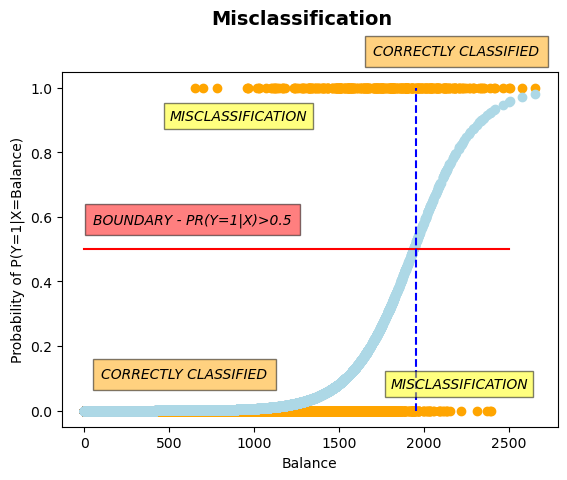

In [81]:
fig = plt.figure()
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

# Set titles for the figure and the subplot respectively
fig.suptitle('Misclassification', fontsize=14, fontweight='bold')

# plot the true value
ax.scatter(x_train, y_train, color='orange')

# plot predicted value
ax.scatter(x_train, y_pred[:,1], color='lightblue')

ax.plot([0,2500],[0.5,0.5], c='red') # decision boundary
ax.plot([1950,1950],[0,1], 'g--', c='blue') # class boundary

ax.set_ylabel('Probability of P(Y=1|X=Balance)');
ax.set_xlabel('Balance');
ax.text(50, 0.58, 'BOUNDARY - PR(Y=1|X)>0.5', style='italic', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 6})
ax.text(1700, 1.1, 'CORRECTLY CLASSIFIED', style='italic', bbox={'facecolor': 'orange', 'alpha': 0.5, 'pad': 6})
ax.text(100, 0.1, 'CORRECTLY CLASSIFIED', style='italic', bbox={'facecolor': 'orange', 'alpha': 0.5, 'pad': 6});
ax.text(500, 0.9, 'MISCLASSIFICATION', style='italic', bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 4});
ax.text(1800, 0.07, 'MISCLASSIFICATION', style='italic', bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 4});


# Metriche di Valutazione in un Problema di Classificazione
## CONFUSION MATRIX


![CONFUSION MATRIX](https://github.com/giandopal/Artificial-Intelligence-with-Python/blob/main/fig/conf-mat.png?raw=true)

# ESEMPIO

![es](https://github.com/giandopal/Artificial-Intelligence-with-Python/blob/main/fig/es-conf.png?raw=true)

## here a summary

![conf1](https://github.com/giandopal/Artificial-Intelligence-with-Python/blob/main/fig/conf1.png?raw=true)





Nel contesto di un problema di **classificazione**, le metriche più comuni per valutare le prestazioni di un modello sono **Precision, Recall, F1-score e Accuracy**.  

## 1. Accuracy  
L'**accuracy** misura la percentuale di campioni classificati correttamente:  

$$
\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Samples}}
$$

✅ **Vantaggio**: Utile quando le classi sono bilanciate.  
❌ **Svantaggio**: Può essere fuorviante in dataset sbilanciati.  

---

## 2. Precision  
La **precision** (o **Positive Predictive Value**) misura quanti degli esempi classificati come positivi sono effettivamente positivi:  

$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$

✅ **Vantaggio**: Utile quando gli **FP (False Positives)** sono costosi (es. diagnosi di malattie).  
❌ **Svantaggio**: Non tiene conto dei **False Negatives (FN)**.  

---

## 3. Recall  
Il **recall** (o **Sensitivity / True Positive Rate**) misura quanti dei veri positivi sono stati correttamente identificati:  

$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$

✅ **Vantaggio**: Utile quando gli **FN (False Negatives)** sono critici (es. test per una grave malattia).  
❌ **Svantaggio**: Può aumentare a scapito della precision.  

---

## 4. F1-score  
L'**F1-score** è la media armonica tra **precision** e **recall**, utile quando c'è un trade-off tra le due metriche:  

$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

✅ **Vantaggio**: Equilibra precision e recall, utile in dataset sbilanciati.  
❌ **Svantaggio**: Non considera i **True Negatives (TN)**.  

---

## Quando usare quale metrica?  
- **Dataset bilanciato** → **Accuracy**  
- **Evitiamo falsi positivi?** (es. spam detection) → **Precision**  
- **Evitiamo falsi negativi?** (es. diagnosi medica) → **Recall**  
- **Equilibrio tra precision e recall?** → **F1-score**  

📌 **Conclusione**: Nessuna metrica è "migliore" in assoluto, dipende dal contesto del problema! 🚀


TN	FP
FN	TP


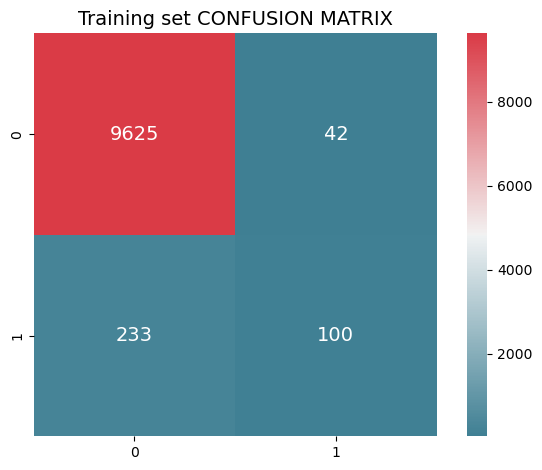

Precision = 0.3003
Recall= 0.7042
F1-score= 0.4211
Accuracy = 0.9725


In [83]:
#Generate confusion matrixes and print main indicators
print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in [['TN', 'FP'],['FN','TP']]]))

#generate confusion matrixes
cm_train = confusion_matrix(y_train, y_pred_class)

hm = sns.heatmap(cm_train,cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 14},cmap = sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Training set CONFUSION MATRIX', fontsize=14)

plt.tight_layout()
plt.show()

print('Precision = {0:5.4f}'.format(precision_score(y_pred_class,y_train)))
print('Recall= {0:5.4f}'.format(recall_score(y_pred_class,y_train)))
print('F1-score= {0:5.4f}'.format(f1_score(y_pred_class,y_train)))
print('Accuracy = {0:5.4f}'.format(accuracy_score(y_pred_class,y_train)))

# ORA PROVA TU

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage

Il dataset contiene 768 istanze e 8 attributi, tra cui:

    Pregnancies: il numero di gravidanze della paziente
    Glucose: il livello di glucosio nel plasma a digiuno della paziente
    BloodPressure: la pressione sanguigna diastolica della paziente
    SkinThickness: lo spessore cutaneo del tricipite della paziente
    Insulin: la quantità di insulina nel sangue della paziente
    BMI: l'indice di massa corporea della paziente
    DiabetesPedigreeFunction: una stima della predisposizione genetica al diabete della paziente
    Outcome: se la paziente ha il diabete (1) o meno (0)

In [84]:
url = 'https://raw.githubusercontent.com/giandopal/Artificial-Intelligence-with-Python/main/data/diabetes.csv'
# Carica il dataset
diabetes = pd.read_csv(url)

In [26]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


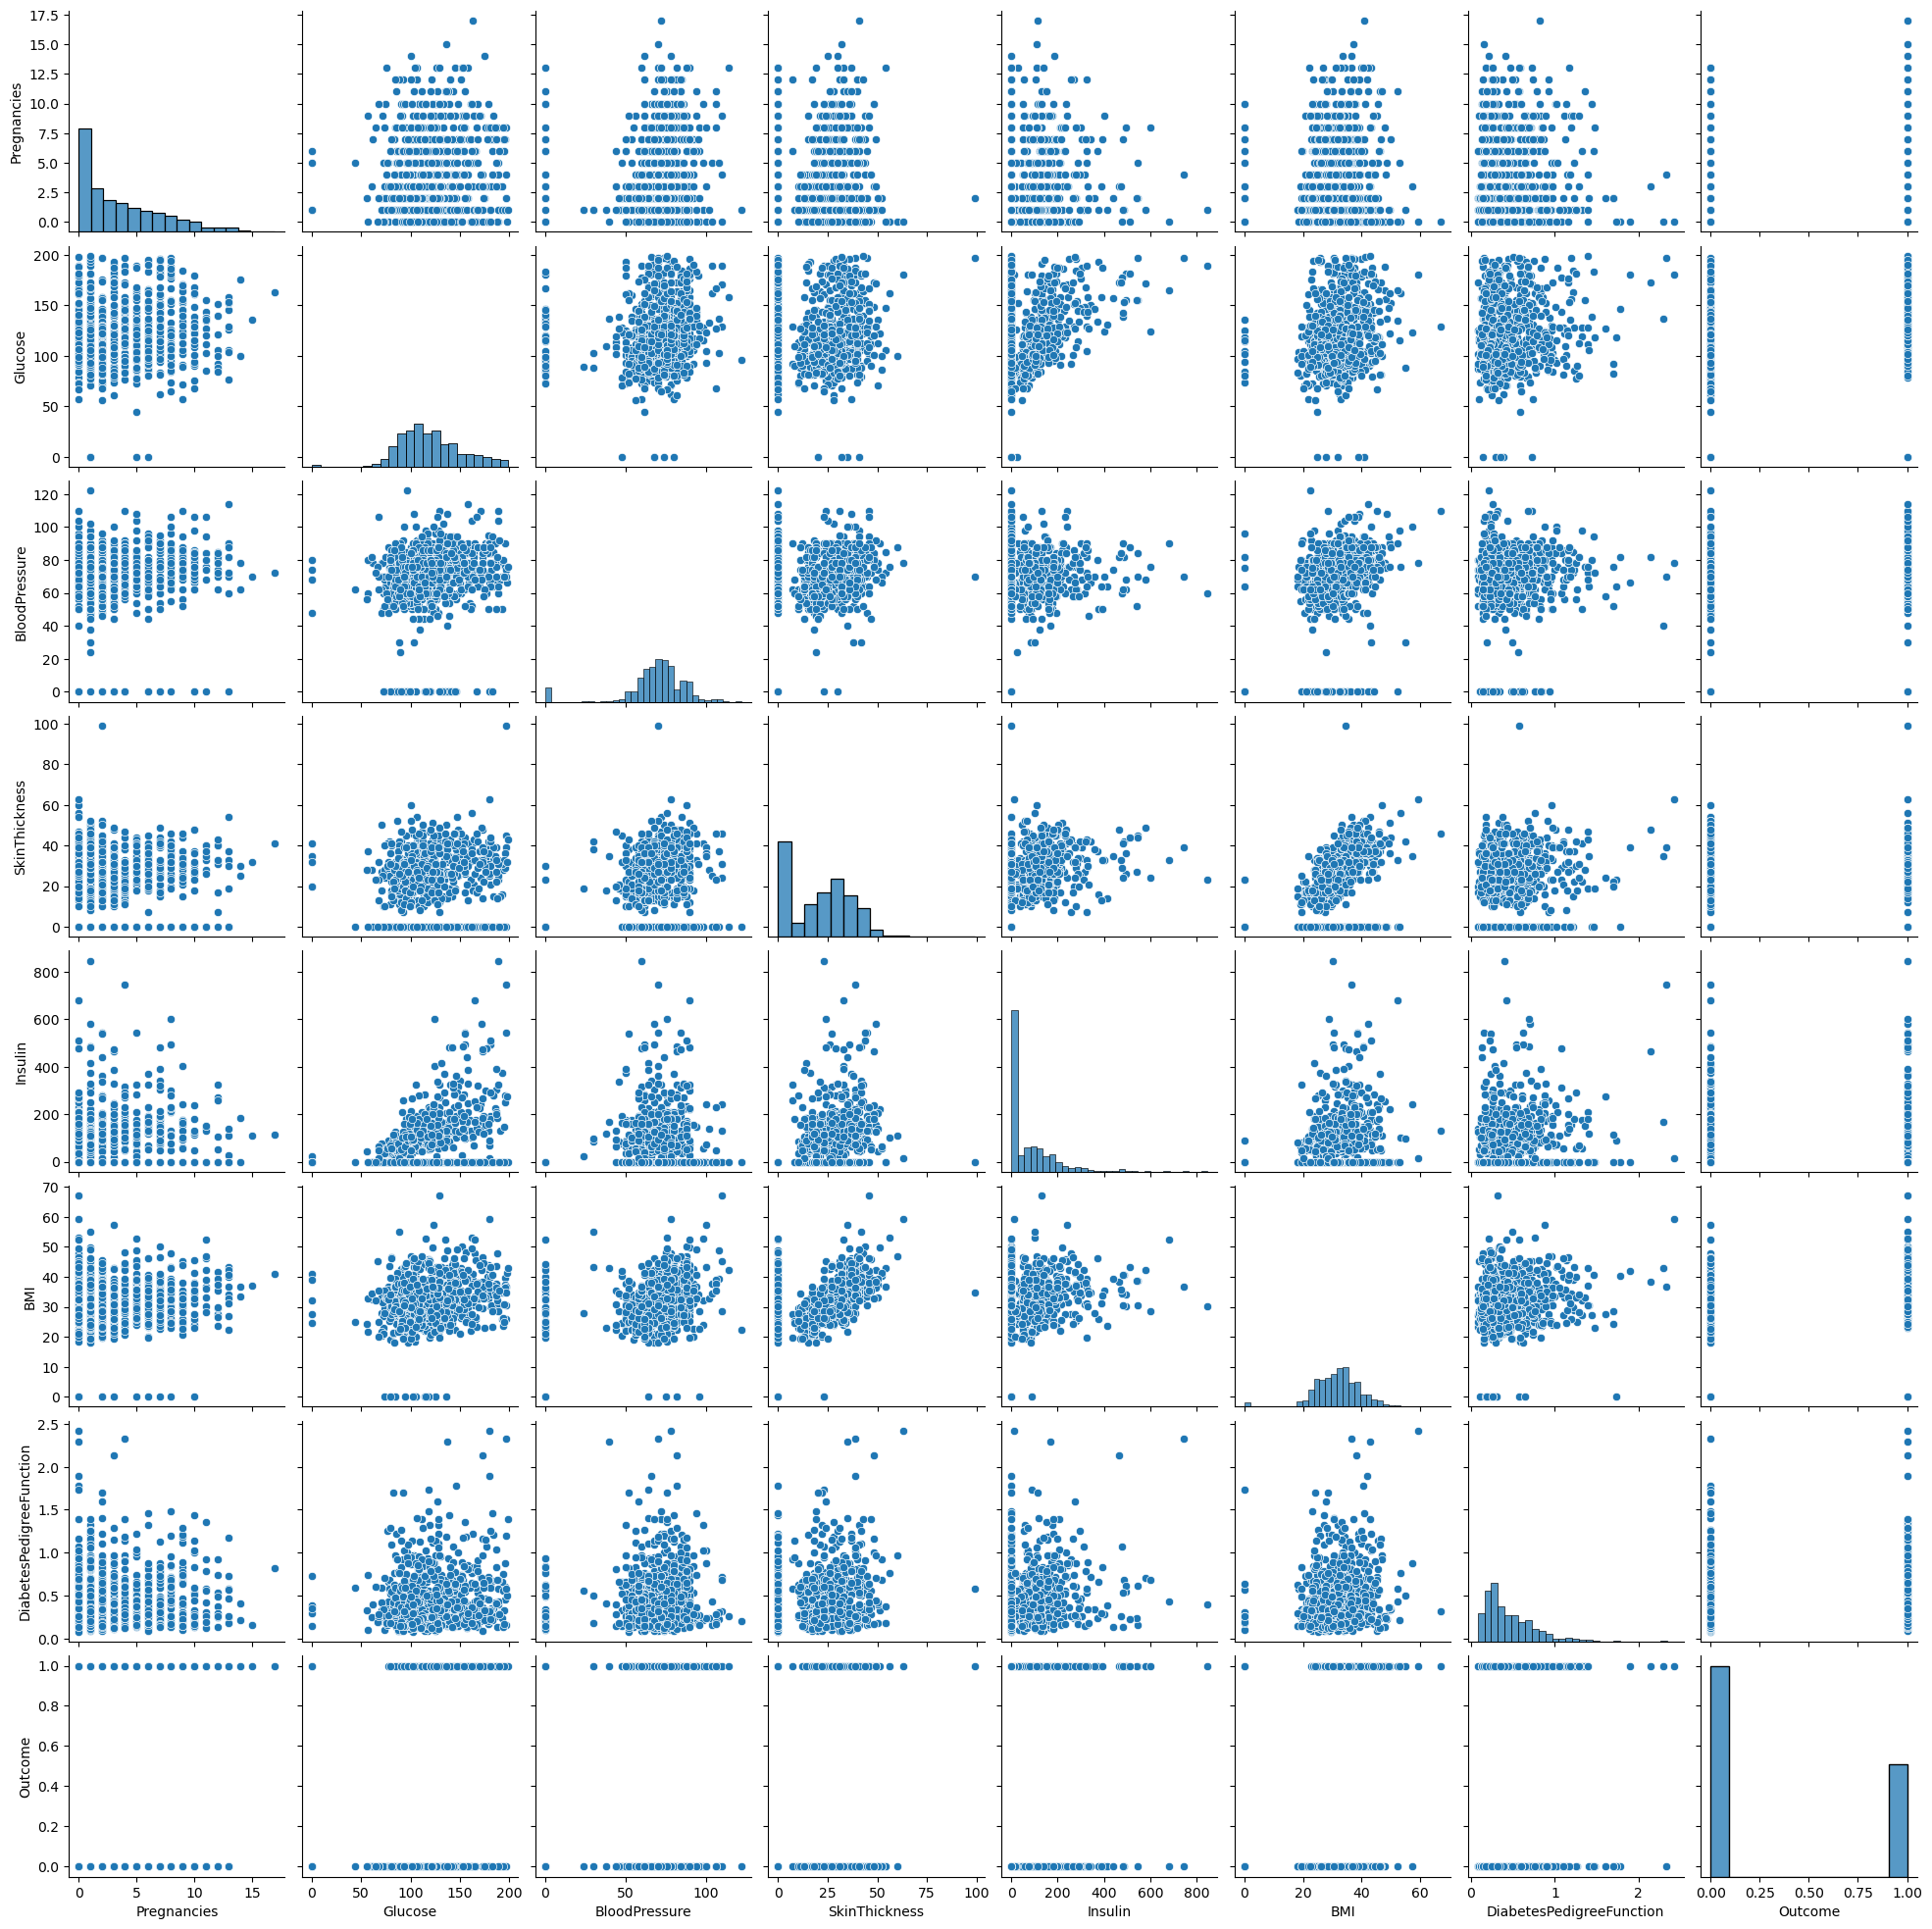

In [85]:
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Outcome']
sns.pairplot(diabetes[names]);

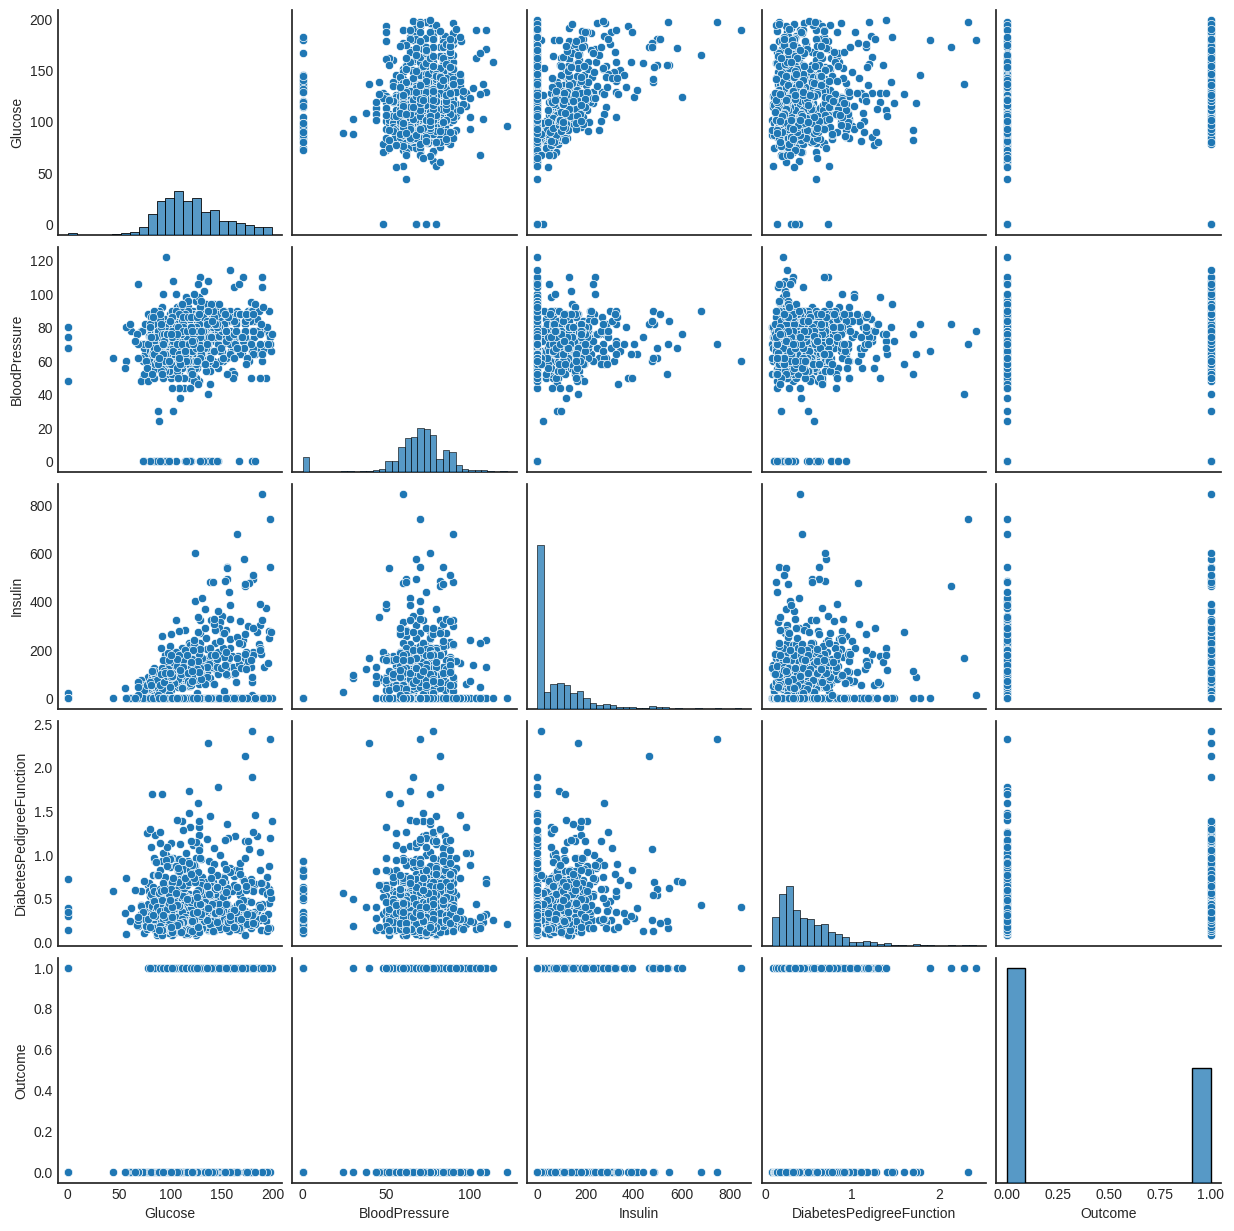

In [229]:
names = ['Glucose', 'BloodPressure', 'Insulin', 'DiabetesPedigreeFunction', 'Outcome']
sns.pairplot(diabetes[names]);

In [91]:

# Dividiamo il dataset in features e target variable
x = diabetes.drop('Outcome', axis=1)
x_train_diabetes = diabetes['Glucose'].values.reshape(-1,1)
y_train_diabetes = diabetes['Outcome'].values

# Creiamo un'istanza di Logistic Regression
logreg = LogisticRegression()

# Addestriamo il modello sui dati di training
logreg.fit(x_train_diabetes, y_train_diabetes)

# Facciamo le predizioni sul test set
y_pred_diabetics = logreg.predict(x_train_diabetes)


In [88]:
print('Precision = {0:5.4f}'.format(precision_score(y_pred_diabetics,y_train_diabetes)))
print('Recall= {0:5.4f}'.format(recall_score(y_pred_diabetics,y_train_diabetes)))
print('F1-score= {0:5.4f}'.format(f1_score(y_pred_diabetics,y_train_diabetes)))
print('Accuracy = {0:5.4f}'.format(accuracy_score(y_pred_diabetics,y_train_diabetes)))

Precision = 0.4851
Recall= 0.6952
F1-score= 0.5714
Accuracy = 0.7461


# Cosa succede se cambiamo il DECISION BOUNDARY?

In [111]:
y_pred = logreg.predict_proba(x_train_diabetes)

# imposta la soglia della probabilità di appartenenza alla classe positiva
threshold = 0.7

# ottieni le previsioni finali
predictions = (y_pred[:,1] >= threshold).astype(int)

In [112]:
print('Precision = {0:5.4f}'.format(precision_score(predictions,y_train_diabetes)))
print('Recall= {0:5.4f}'.format(recall_score(predictions,y_train_diabetes)))
print('F1-score= {0:5.4f}'.format(f1_score(predictions,y_train_diabetes)))
print('Accuracy = {0:5.4f}'.format(accuracy_score(predictions,y_train_diabetes)))

Precision = 0.2724
Recall= 0.8202
F1-score= 0.4090
Accuracy = 0.7253
